In [1]:
import numpy as np
import pandas as pd

## Algorithm: 

### The end goal is to find a matrix which gives the minimum square loss w.r.t. the original matrix (i.e. reviews). 


$$min_{Z \in \mathbb{R}^{m\times n}}\ \  f(Z) :=  \frac{1}{2}\sum_{(i,j)\in \Omega} \left( Z_{ij} - X_{ij}\right)^{2}$$

Subject to having a low rank (or a small nuclear norm). 


NOTE: It would seem to me that the gradient of this function would simply be: 
$$ \nabla f(Z) = \sum_{ij}(Z_{ij} - X_{ij}) $$
right?


### This found matrix needs to have low rank for two reasons: 
1. It is a constraint that allows for the problem to be well posed. (Otherwise the matrix elements could be anything). 
2. Rank identifies the number of linearly indipendent columns, since we want to build a recommender system we would like there to be relations among the columns, the constraint is not a weakness, it is a desired property.




### How is this matrix found? (i think)

1. The Frank-Wolfe algorithm starts at the zeroth (k) iteration with a guess of a good solution, this solution is called $Z^{k}$. 
2. This solution (it is a matrix) is then used to solve a "sub"-minimization problem. Frank-Wolfe looks for a matrix $Z$ (with nuclear norm below a certain quantity) which minimizes the following quantity: $$ \nabla f(Z^{k}) \cdot Z $$ The matrix which satisfies this is called $\tilde{Z}^{k}$. 
3. Then the algorithm chooses $Z^{k+1}$ by means of a standard stepping procedure: $$ Z^{k+1} = (1-\alpha_{k}) Z^{k} + \alpha_{k}\tilde{Z}^{k}$$ 


Note that the FW algorithms already gives a recipe to calculate the matrix $\tilde{Z}^{k}$ at step 2. It holds that: 
$$ \tilde{Z}^{k} = -\delta u_{1}(v_{1})^{T}$$ is a rank-one matrix. Where $u_{1}, v_{1}$ are the singular vectors (why only 2 ?) associated with the largest singular value of $\nabla f(Z^{k})$.

In [39]:
#------------IDEAS TO APPLY TO ACTUAL DATA---------------

# df.fillna(0)
# function to replace NaNs with 0s. (nobody gives 0 rating, come on.)

# Then I can use https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.svds.html
# to search for the singular values of the gradient of the matrix. 

# Then I update the matrix with the procedure in the paper/slides

# Repeat until tolerance/max iterations reached (?)

In [80]:
# (probably won't need this function, maybe as a check on the nuclear norm of the solution at each step (?) ) #



#This function calculates the nuclear norm of a matrix.
# (the nuclear norm is the sum of all non-zero singular values of a matrix)


#the [1] accesses the eigenvalues of the diagonal matrix D -----> X^{T}*D*X
def nuclear_norm(A):
    return np.sum(np.linalg.svd(A)[1])

X = np.array([[1,0,0], [0,1,0], [0, 0, 1]])
Y= np.array([[1,0,1], [0,1,0], [1, 0, 1]])

print('\n Example of nuclear norm:')
print('\n The matrix is: \n', X)
print('\n Its nuclear norm is: ', nuclear_norm(X))


 Example of nuclear norm:

 The matrix is: 
 [[1 0 0]
 [0 1 0]
 [0 0 1]]

 Its nuclear norm is:  3.0


In [2]:
from scipy.linalg import svd

# Tried both of these, not sure which is WORST

In [18]:
from sklearn.decomposition import TruncatedSVD
# svd
def create_update(g):
    U,s,VT = svd(g)
    return (U[1] * VT[1])

In [20]:
from sklearn.decomposition import TruncatedSVD
# svd
def create_update(g):
    retain_biggest_sv = TruncatedSVD(n_components=1)
    retain_biggest_sv.fit(g)
    result = retain_biggest_sv.transform(g)
    return result

In [21]:
def step(data, delta = 3):
    # might not be a good idea to pass the original data matrix everytime
    for i in range(1, 10):
        steps = 2/(i+2)
        if (i==1):
            it = np.array([42,42,23,123,12,24, 12,3,41]).reshape(3,3)
        else:
            it = z_kp1

    # ----------calculate gradient here (it's a matrix as defined in the paper)
        g = it - data 
    #-----------find SVD of gradient
    
        
    #-----------take u_1 and v_1 and delta and create update TILDE ZK (check that it has rank one)
    
        zk_tilde = -delta * create_update(g)
        print('Rank of tilde zk: ', np.linalg.matrix_rank(zk_tilde))
    #------------create new iterate Z^{k+1}

        z_kp1 = (1 - steps)*it + steps*zk_tilde
        print('\n', z_kp1, '\n')   
    
    #------------repeat
    return z_kp1

example = np.array([1,0,1, 0,0,0,0,0,1]).reshape(3,3)

step(example)

Rank of tilde zk:  1

 [[ -91.92592405  -91.92592405  -98.25925739]
 [-208.47498798 -245.47498798 -241.47498798]
 [ -41.28002916  -44.28002916  -31.61336249]] 

Rank of tilde zk:  1

 [[-291.72094153 -291.72094153 -294.88760819]
 [-707.99606528 -726.49606528 -724.49606528]
 [-122.63732397 -124.13732397 -117.80399064]] 

Rank of tilde zk:  1

 [[ -784.9220792   -784.9220792   -786.8220792 ]
 [-1920.68528308 -1931.78528308 -1930.58528308]
 [ -326.84215049  -327.74215049  -323.94215049]] 

Rank of tilde zk:  1

 [[-1885.05538355 -1885.05538355 -1886.32205022]
 [-4619.31650915 -4626.71650915 -4625.91650915]
 [ -783.42258216  -784.02258216  -781.48924883]] 

Rank of tilde zk:  1

 [[ -4146.66570757  -4146.66570757  -4147.57046947]
 [-10164.34818042 -10169.63389471 -10169.06246614]
 [ -1722.50323141  -1722.93180283  -1721.12227903]] 

Rank of tilde zk:  1

 [[ -8497.93374104  -8497.93374104  -8498.61231247]
 [-20831.46721248 -20835.43149819 -20835.00292676]
 [ -3529.49533795  -3529.81676652 

array([[ -53253.35147659,  -53253.35147659,  -53253.69693113],
       [-130543.50645415, -130545.52463597, -130545.30645415],
       [ -22116.47508453,  -22116.6387209 ,  -22115.94781181]])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 3.6196    ]
 [ 8.77091014]
 [13.92222029]]


### FabianP


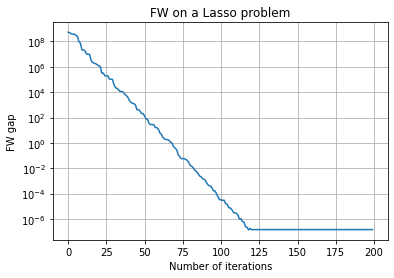

Sparsity of solution: 0.1%


In [25]:
import numpy as np
from scipy import sparse

# .. for plotting ..
import pylab as plt
# .. to generate a synthetic dataset ..
from sklearn import datasets

n_samples, n_features = 1000, 10000
A, b = datasets.make_regression(n_samples, n_features)

def FW(alpha, max_iter=200, tol=1e-8):
    # .. initial estimate, could be any feasible point ..
    x_t = sparse.dok_matrix((n_features, 1))
    trace = []  # to keep track of the gap

    # .. some quantities can be precomputed ..
    Atb = A.T.dot(b)
    for it in range(max_iter):
        # .. compute gradient. Slightly more involved than usual because ..
        # .. of the use of sparse matrices ..
        Ax = x_t.T.dot(A.T).ravel()
        grad = (A.T.dot(Ax) - Atb)

        # .. the LMO results in a vector that is zero everywhere except for ..
        # .. a single index. Of this vector we only store its index and magnitude ..
        idx_oracle = np.argmax(np.abs(grad))
        mag_oracle = alpha * np.sign(-grad[idx_oracle])
        g_t = x_t.T.dot(grad).ravel() - grad[idx_oracle] * mag_oracle
        trace.append(g_t)
        if g_t <= tol:
            break
        q_t = A[:, idx_oracle] * mag_oracle - Ax
        step_size = min(q_t.dot(b - Ax) / q_t.dot(q_t), 1.)
        x_t = (1. - step_size) * x_t
        x_t[idx_oracle] = x_t[idx_oracle] + step_size * mag_oracle
    return x_t, np.array(trace)

# .. plot evolution of FW gap ..
sol, trace = FW(.5 * n_features)
plt.plot(trace)
plt.yscale('log')
plt.xlabel('Number of iterations')
plt.ylabel('FW gap')
plt.title('FW on a Lasso problem')
plt.grid()
plt.show()

sparsity = np.mean(sol.toarray().ravel() != 0)
print('Sparsity of solution: %s%%' % (sparsity * 100))